

## Exploring Data

We will start this project by implementing the same steps in the previous one since we're dealing with the same data.

### Importing Libraries

 * The <u>**shutil**</u> library provides functions for file management tasks such as copying and deleting files.
 * The <u>**random**</u> library provides functions for generating random numbers and selecting random elements from a list.
 * The <u>**os**</u> library provides functions for interacting with the operating system, such as creating and deleting directories.
 * The <u>**time**</u> library provides functions for working with time and dates.
 * The <u>**Image**</u> module from the PIL library provides functions for working with image files.
 * The <u>**cv2**</u> library provides additional functions for working with image files.
 * The <u>**numpy**</u> library provides functions for working with arrays and statistics.




In [ ]:
import os
import shutil
import matplotlib.pyplot as plt
from PIL import Image
import random
import time
import numpy as np
import pandas as pd
import cv2

### Connecting to gDrive

we have our dataset in gdrive and we want to save the model output in gdrive too.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### copy and unzip the dataset


In [ ]:
shutil.copy('/content/drive/MyDrive/DL projects/datasets/bird species/450 bird species.zip','/content/samples.zip')

'/content/samples.zip'

In [ ]:
!unzip samples.zip

### Define working paths

In [ ]:
images_to_test_path = '/content/images to test'
test_path = '/content/test'
train_path ='/content/train'
validation_path = '/content/valid'

In [ ]:
print(len(os.listdir(images_to_test_path)))
print(len(os.listdir(test_path)))
print(len(os.listdir(train_path)))
print(len(os.listdir(validation_path)))


5
450
450
450


### Dataset stats

The function called `print_stats` is used to print the statistics of image dataset in order to take a look on class balance/imbalance.

In [ ]:
def print_stats(path = '', verbose = False):
    """
    Print statistics of an image dataset.

    Args:
        path (str): The directory path of the image dataset.
        verbose (bool): If True, print the number of images in each subdirectory.
    
    Returns:
        list : A list of the number of images in each subdirectory of the dataset.

    """
    sizes = []
    i = 0
    for filename in os.listdir(path):
        i+=1
        size = len(os.listdir(path + '/' + filename))
        sizes.append(size)
        if verbose == True :
            print(size , end = " ")
            if (i% 20 == 0):
                print()
    print()

    print("Max samples = {}".format(max(sizes)))
    print("Min samples = {}".format(min(sizes)))
    print("sum samples = {}".format(sum(sizes)))
    print("Average sample size = {}".format(np.mean(sizes)))
    print("Sample sizes standard deviation = {}".format(np.std(sizes)))

    return sizes
        

In [ ]:
print('validation set stats :')
sizes = print_stats(validation_path)
print('\n*********************')
print('testing set stats :')
sizes = print_stats(test_path)


validation set stats :

Max samples = 5
Min samples = 5
sum samples = 2250
Average sample size = 5.0
Sample sizes standard deviation = 0.0

*********************
testing set stats :

Max samples = 5
Min samples = 5
sum samples = 2250
Average sample size = 5.0
Sample sizes standard deviation = 0.0


In [ ]:
sizes = print_stats(train_path , verbose = True)


135 143 169 162 150 153 136 138 141 163 152 202 165 159 169 163 168 155 156 144 
160 185 144 144 160 201 194 160 158 200 177 132 187 158 175 160 186 136 135 166 
162 197 157 138 194 150 153 176 160 156 156 160 139 135 155 164 152 155 139 144 
163 168 156 154 150 161 143 156 154 160 135 152 162 150 141 183 139 180 157 177 
137 138 167 142 167 132 189 157 132 150 153 164 160 155 132 136 160 153 139 155 
131 153 173 157 141 190 154 139 139 133 152 153 154 170 167 153 161 159 163 142 
177 153 141 173 130 142 154 181 155 156 139 162 176 155 160 180 163 163 151 166 
159 152 150 161 150 144 136 154 158 162 152 144 164 141 160 155 156 161 134 161 
160 160 154 175 166 157 138 153 154 131 143 163 143 160 138 162 175 137 161 164 
163 138 163 155 184 155 150 162 150 154 164 164 160 167 152 170 136 142 154 144 
135 140 188 132 188 154 149 133 160 130 140 159 154 163 143 155 155 163 137 165 
132 132 140 172 137 160 157 164 144 157 160 163 138 160 165 197 155 179 154 142 
143 185 175 186 159 138 159 

**We certainly have imbalanced classes in our train set.**

Let's further explore the data using pandas library.

In [ ]:
df = pd.read_csv('/content/birds.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75126 entries, 0 to 75125
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   class id          75126 non-null  int64 
 1   filepaths         75126 non-null  object
 2   labels            75126 non-null  object
 3   scientific label  75126 non-null  object
 4   data set          75126 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [ ]:
df.sample(frac = 1).head()

,class id,filepaths,labels,scientific label,data set
52176,333,train/OVENBIRD/140.jpg,OVENBIRD,Seiurus aurocapilla,train
71670,208,test/FRIGATE/5.jpg,FRIGATE,Fregatidae,test
66015,421,train/TROPICAL KINGBIRD/078.jpg,TROPICAL KINGBIRD,Tyrannus melancholicus,train
37745,241,train/GROVED BILLED ANI/120.jpg,GROVED BILLED ANI,Crotophaga sulcirostris,train
373,2,train/ABYSSINIAN GROUND HORNBILL/028.jpg,ABYSSINIAN GROUND HORNBILL,Bucorvus abyssinicus,train


The function called `display_samples` is used to randomly display a specified number of images from a dataset.






In [ ]:
def display_samples(path = '', ncols = 1, nrows= 1 , verbose = False):

    """
    Display random samples from an image dataset.

    Args:
        path (str): The directory path of the image dataset.
        ncols (int): The number of columns of images to display in the figure.
        nrows (int): The number of rows of images to display in the figure.
        verbose (bool): If True, print the classes and images paths.

    Returns:
        None

    """
    
    
    imgs = []
    classes = random.sample(os.listdir(path), ncols * nrows)
    imgs_idx = [random.randint(0,len(os.listdir(path + '/'+ class_name))-1) 
            for class_name in classes]
    for i, img_idx in enumerate(imgs_idx):
        imgs.append(path + '/' + classes[i] + '/' +
                    os.listdir(path + '/' + classes[i])[img_idx])

    if verbose :    
        print(classes)
        print()
        print(imgs_idx)
        print()
        print(imgs)

    i = 0
    fig = plt.figure(figsize=(10, 10))
    # Adds a subplot at the 1st position
    for i in range(len(imgs)):
        fig.add_subplot(nrows, ncols, i + 1)
        img = cv2.imread(imgs[i])
    # showing image
        plt.imshow(img)
        plt.axis('off')
        plt.title(classes[i],fontsize = 10)

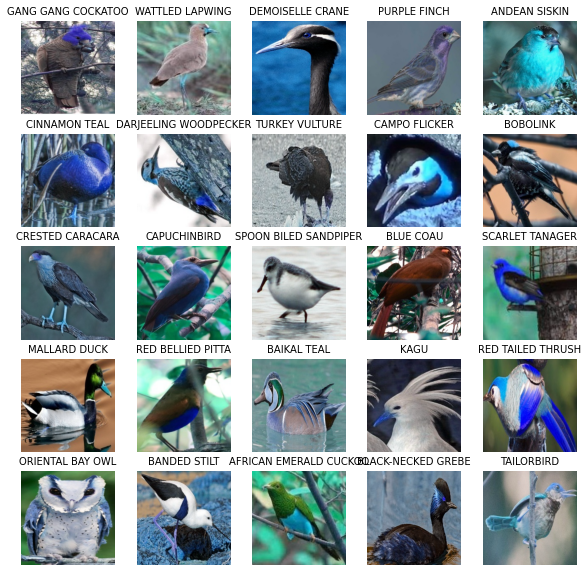

In [ ]:
display_samples(train_path, 5 ,5)

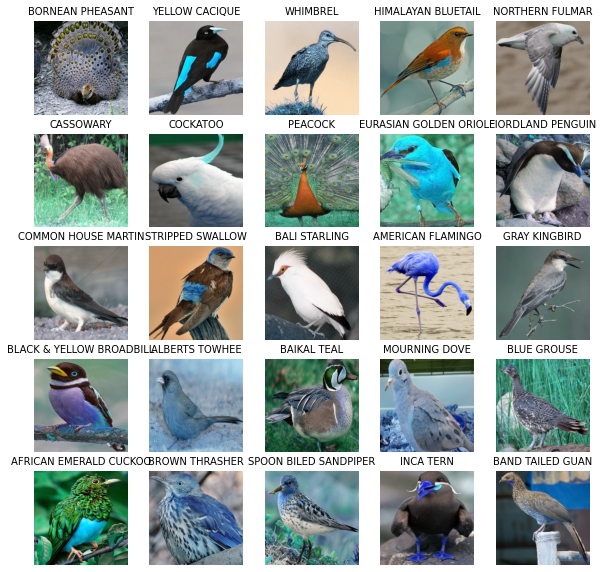

In [ ]:
display_samples(test_path, 5 ,5)

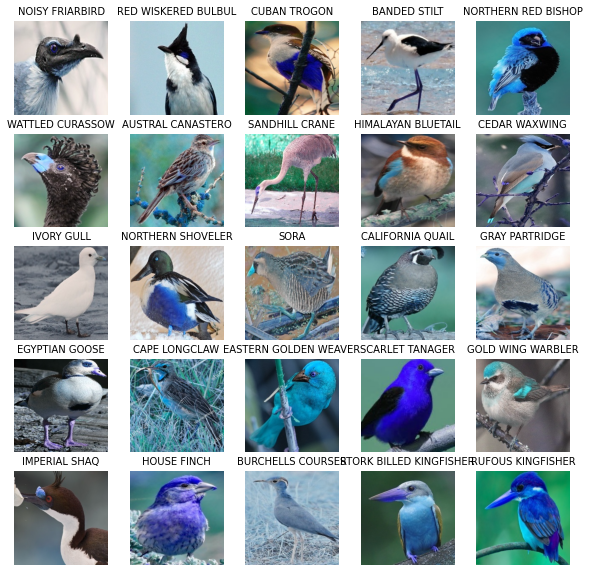

In [ ]:
display_samples(validation_path, 5 ,5)

# Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        shear_range = 0.1,
        horizontal_flip=True,
        brightness_range=(0.9,1.1),
        rescale=1./255,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
BATCH = 64
train_augmented = train_datagen.flow_from_directory(
    directory = train_path,
    target_size=(150, 150),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=True,
    seed=1,
    interpolation='nearest'
)

#print(train_augmented.class_indices)


Found 70626 images belonging to 450 classes.


In [ ]:
test_augmented = test_datagen.flow_from_directory(
    directory = test_path,
    target_size=(150, 150),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=True,
    seed=1,
    interpolation='nearest'
)



Found 2250 images belonging to 450 classes.


In [ ]:
validation_augmented = validation_datagen.flow_from_directory(
    directory = validation_path,
    target_size=(150, 150),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=True,
    seed=1,
    interpolation='nearest'
)



Found 2250 images belonging to 450 classes.


# Building the model

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

mnet_base = MobileNetV2(input_shape = (150,150,3),
                       include_top = False,
                       weights = 'imagenet')

mnet_base.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
#mnet_base.summary()

In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense, GlobalAveragePooling2D, ReLU

In [ ]:
inputs = Input(shape = (150,150,3))
x = mnet_base(inputs)
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.25)(x)
x = Dense(1200)(x)

x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.25)(x)
x = Dense(900)(x)

x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.25)(x)
outputs = Dense(450,activation = 'softmax')(x)

model = Model(inputs , outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 1280)             5120      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 1280)              0         
                                                             

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate = 0.001),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
models_path = '/content/Models'
#shutil.rmtree(models_path)
os.makedirs(models_path)

# Training the model


## Callbacks

In [ ]:
from tensorflow.keras.callbacks import  ModelCheckpoint, CSVLogger

checkpoint = ModelCheckpoint(filepath = models_path + '/checkpoint.hdf5',
    monitor = "val_accuracy",
    save_best_only=True,
    save_weights_only=True,
    verbose=1,
    mode = 'max')

filename='log.csv'
history_logger= CSVLogger(filename, separator=",", append=True)


callbacks = [checkpoint, history_logger]

## Phase 1

In [ ]:
EPOCHS = 10
beg = int(time.time())

history = model.fit(
        train_augmented,
        steps_per_epoch = train_augmented.samples  // BATCH,
        epochs = EPOCHS,
        validation_data = validation_augmented,
        validation_steps = validation_augmented.samples // BATCH,
        callbacks = callbacks)

end = int(time.time())
t = end - beg
hrs = t // 3600
mins = (t - 3600 * hrs) // 60
secs = t % 60
print("training took {} hrs -- {} mins -- {} secs".format(hrs,mins,secs))
model.save_weights(models_path + '/first_try_weights.h5')
model.save(models_path + '/first_try.h5')

Epoch 1/10
1103/1103 [==============================] - ETA: 0s - loss: 2.1268 - accuracy: 0.4807
Epoch 1: val_accuracy improved from -inf to 0.73795, saving model to /content/Models/checkpoint.hdf5
1103/1103 [==============================] - 488s 442ms/step - loss: 2.1268 - accuracy: 0.4807 - val_loss: 0.9707 - val_accuracy: 0.7379
Epoch 2/10
1103/1103 [==============================] - ETA: 0s - loss: 1.9560 - accuracy: 0.5143
Epoch 2: val_accuracy improved from 0.73795 to 0.75268, saving model to /content/Models/checkpoint.hdf5
1103/1103 [==============================] - 483s 438ms/step - loss: 1.9560 - accuracy: 0.5143 - val_loss: 0.8599 - val_accuracy: 0.7527
Epoch 3/10
1103/1103 [==============================] - ETA: 0s - loss: 1.8443 - accuracy: 0.5397
Epoch 3: val_accuracy improved from 0.75268 to 0.78304, saving model to /content/Models/checkpoint.hdf5
1103/1103 [==============================] - 491s 445ms/step - loss: 1.8443 - accuracy: 0.5397 - val_loss: 0.8015 - val_acc

In [ ]:
scores = model.evaluate(test_augmented)

36/36 [==============================] - 5s 125ms/step - loss: 0.5935 - accuracy: 0.8369


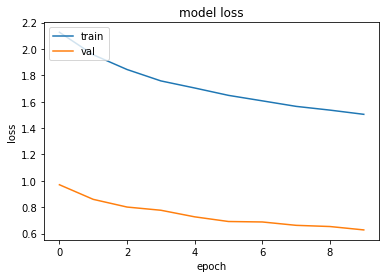

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

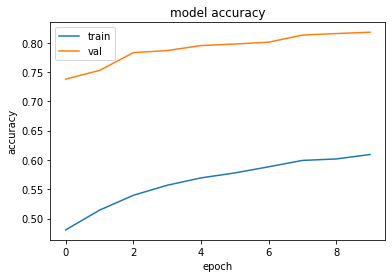

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Phase 2

In [ ]:
model.layers[1].trainable = True
for sub_layer in model.layers[1].layers[:-38]:
    sub_layer.trainable = False
    #print(sub_layer.name)

In [41]:
model.compile(optimizer = Adam(learning_rate = 0.001 * 0.2),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 1280)             5120      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 1280)              0         
                                                             

In [42]:
beg = int(time.time())

history = model.fit(
        train_augmented,
        steps_per_epoch = train_augmented.samples  // BATCH,
        epochs = 10,
        validation_data = validation_augmented,
        validation_steps = validation_augmented.samples // BATCH,
        callbacks = callbacks)

end = int(time.time())
t = end - beg
hrs = t // 3600
mins = (t - 3600 * hrs) // 60
secs = t % 60
print("training took {} hrs -- {} mins -- {} secs".format(hrs,mins,secs))
model.save_weights(models_path + '/second_try_weights_colab.h5')
model.save(models_path + '/second_try_colab.h5')

Epoch 1/10
1103/1103 [==============================] - ETA: 0s - loss: 0.8406 - accuracy: 0.7674
Epoch 1: val_accuracy improved from 0.81920 to 0.84196, saving model to /content/Models/checkpoint.hdf5
1103/1103 [==============================] - 535s 478ms/step - loss: 0.8406 - accuracy: 0.7674 - val_loss: 0.5620 - val_accuracy: 0.8420
Epoch 2/10
1103/1103 [==============================] - ETA: 0s - loss: 0.7251 - accuracy: 0.7988
Epoch 2: val_accuracy improved from 0.84196 to 0.88482, saving model to /content/Models/checkpoint.hdf5
1103/1103 [==============================] - 489s 443ms/step - loss: 0.7251 - accuracy: 0.7988 - val_loss: 0.4112 - val_accuracy: 0.8848
Epoch 3/10
1103/1103 [==============================] - ETA: 0s - loss: 0.6632 - accuracy: 0.8140
Epoch 3: val_accuracy did not improve from 0.88482
1103/1103 [==============================] - 492s 446ms/step - loss: 0.6632 - accuracy: 0.8140 - val_loss: 0.4544 - val_accuracy: 0.8661
Epoch 4/10
1103/1103 [==============

In [43]:
scores_2 = model.evaluate(test_augmented)

36/36 [==============================] - 4s 110ms/step - loss: 0.2684 - accuracy: 0.9222


## Phase 3

In [47]:
model.layers[1].trainable = True
for sub_layer in model.layers[1].layers[:-74]:
    sub_layer.trainable = False
    #print(sub_layer.name)

In [48]:
model.compile(optimizer = Adam(learning_rate = 0.001 * 0.2 * 0.2),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 1280)             5120      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 1280)              0         
                                                             

In [ ]:
shutil.copy(models_path,'/content/drive/MyDrive/DL projects/Models')

In [49]:
beg = int(time.time())

history = model.fit(
        train_augmented,
        steps_per_epoch = train_augmented.samples  // BATCH,
        epochs = 10,
        validation_data = validation_augmented,
        validation_steps = validation_augmented.samples // BATCH,
        callbacks = callbacks)

end = int(time.time())
t = end - beg
hrs = t // 3600
mins = (t - 3600 * hrs) // 60
secs = t % 60
print("training took {} hrs -- {} mins -- {} secs".format(hrs,mins,secs))
model.save_weights(models_path + '/3rd_try_weights.h5')
model.save(models_path + '/3rd_try.h5')

Epoch 1/10
1103/1103 [==============================] - ETA: 0s - loss: 0.3591 - accuracy: 0.8959
Epoch 1: val_accuracy improved from 0.92277 to 0.94554, saving model to /content/Models/checkpoint.hdf5
1103/1103 [==============================] - 500s 450ms/step - loss: 0.3591 - accuracy: 0.8959 - val_loss: 0.1915 - val_accuracy: 0.9455
Epoch 2/10
1103/1103 [==============================] - ETA: 0s - loss: 0.3106 - accuracy: 0.9081
Epoch 2: val_accuracy did not improve from 0.94554
1103/1103 [==============================] - 496s 449ms/step - loss: 0.3106 - accuracy: 0.9081 - val_loss: 0.1984 - val_accuracy: 0.9393
Epoch 3/10
1103/1103 [==============================] - ETA: 0s - loss: 0.2854 - accuracy: 0.9150
Epoch 3: val_accuracy did not improve from 0.94554
1103/1103 [==============================] - 491s 445ms/step - loss: 0.2854 - accuracy: 0.9150 - val_loss: 0.1989 - val_accuracy: 0.9397
Epoch 4/10
1103/1103 [==============================] - ETA: 0s - loss: 0.2689 - accuracy

# Final results and model evaluation

Our model has a final test accuracy of **95.91%** !!

In [52]:
scores_2 = model.evaluate(test_augmented)
model.load_weights('/content/Models/checkpoint.hdf5')
scores_3 = model.evaluate(test_augmented)


36/36 [==============================] - 4s 110ms/step - loss: 0.1471 - accuracy: 0.9591


# Saving results in gDrive

In [55]:
shutil.copytree(models_path,'/content/drive/MyDrive/DL projects/Models')


'/content/drive/MyDrive/DL projects/Models'